<a href="https://colab.research.google.com/github/Sim-mi-gyeong/DataAnalysis/blob/main/TermProject09_Before_and_After_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 2020년 or 20201년 전후 코로나로 인해 국가별로 증가/감소한 요소가 존재하는가?
# -> 이 증가/감소한 요소가 행복지수에 반영이 되었는가?
# 특히 동아시아 국가에서

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df2017=pd.read_csv('/content/drive/MyDrive/dataset/2017.csv')
df2018=pd.read_csv('/content/drive/MyDrive/dataset/2018.csv')
df2019=pd.read_csv('/content/drive/MyDrive/dataset/2019.csv')
df2020=pd.read_csv('/content/drive/MyDrive/dataset/2020.csv')
df2021=pd.read_csv('/content/drive/MyDrive/dataset/2021.csv')

In [4]:
df2018['Perceptions of corruption']=df2018['Perceptions of corruption'].fillna(df2018['Perceptions of corruption'].mean())

In [6]:
df2020

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,South Asia,2.5669,2.505530,0.470367,0.525900,0.396573,-0.096429
1,Albania,Central and Eastern Europe,4.8827,4.772713,0.671070,0.687081,0.781994,-0.042309
2,Algeria,Middle East and North Africa,5.0051,4.918397,0.803385,0.659052,0.466611,-0.121105
3,Argentina,Latin America and Caribbean,5.9747,5.869954,0.900568,0.688038,0.831132,-0.194914
4,Armenia,Commonwealth of Independent States,4.6768,4.561953,0.757479,0.667507,0.712018,-0.138780
...,...,...,...,...,...,...,...,...
142,Venezuela,Latin America and Caribbean,5.0532,4.927210,0.890408,0.665053,0.623278,-0.169091
143,Vietnam,Southeast Asia,5.3535,5.287251,0.849987,0.679527,0.939593,-0.094533
144,Yemen,Middle East and North Africa,3.5274,3.421250,0.817981,0.567273,0.599920,-0.157735
145,Zambia,Sub-Saharan Africa,3.7594,3.640474,0.698824,0.552994,0.806500,0.078037


In [8]:
col_list=['Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

mean2017=df2017[col_list].mean()
mean2018=df2018[col_list].mean()
mean2019=df2019[col_list].mean()
mean2020=df2020[col_list].mean()
mean2021=df2021[col_list].mean()

# happy20_top10 = df2020.groupby('Country')['Score'].max().sort_values(ascending=False).head(10).reset_index()
# df2020.columns_top10 = ['Country','Score']

In [9]:
df2021

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,South Asia,2.523,0.370,0.126,0.382,-0.102,0.924
1,Albania,Central and Eastern Europe,5.117,1.008,0.646,0.785,-0.030,0.901
2,Algeria,Middle East and North Africa,4.887,0.946,0.552,0.480,-0.067,0.752
3,Argentina,Latin America and Caribbean,5.929,1.162,0.646,0.828,-0.182,0.834
4,Armenia,Commonwealth of Independent States,5.283,0.996,0.585,0.825,-0.168,0.629
...,...,...,...,...,...,...,...,...
142,Venezuela,Latin America and Caribbean,4.892,0.852,0.574,0.615,-0.169,0.827
143,Vietnam,Southeast Asia,5.411,0.817,0.616,0.940,-0.098,0.796
144,Yemen,Middle East and North Africa,3.658,0.329,0.272,0.602,-0.147,0.800
145,Zambia,Sub-Saharan Africa,4.073,0.528,0.231,0.782,0.061,0.823


In [12]:
mean2020

Score                           5.511924
GDP per capita                  5.410239
Healthy life expectancy         0.813198
Freedom to make life choices    0.646902
Generosity                      0.786465
Perceptions of corruption      -0.016532
dtype: float64

In [13]:
df_mean=pd.DataFrame(data=[mean2017, mean2018, mean2019, mean2020, mean2021], index=[2017,2018,2019,2020,2021])
df_mean

,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
2017,5.383871,0.999573,0.561900,0.409222,0.243393,0.121671
2018,5.415694,0.907510,0.611143,0.457959,0.178653,0.112240
2019,5.456469,0.921408,0.739095,0.396728,0.181313,0.110748
2020,5.511924,5.410239,0.813198,0.646902,0.786465,-0.016532
2021,5.538054,0.975605,0.518857,0.791449,-0.015762,0.725578


In [52]:
mean1719=df_mean[col_list].iloc[:3].mean()
mean1719

Score                           5.418678
GDP per capita                  0.942830
Healthy life expectancy         0.637379
Freedom to make life choices    0.421303
Generosity                      0.201120
Perceptions of corruption       0.114886
dtype: float64

In [53]:
mean20_21=df_mean[col_list].iloc[4:].mean()
mean20_21

Score                           5.538054
GDP per capita                  0.975605
Healthy life expectancy         0.518857
Freedom to make life choices    0.791449
Generosity                     -0.015762
Perceptions of corruption       0.725578
dtype: float64

In [65]:
mean_diff=pd.DataFrame(data=mean2021-mean1719)
mean_diff

,0
Score,0.119376
GDP per capita,0.032775
Healthy life expectancy,-0.118522
Freedom to make life choices,0.370146
Generosity,-0.216881
Perceptions of corruption,0.610692


In [55]:
mean2021.tolist()

[5.538054421768709,
 0.9756054421768708,
 0.5188571428571429,
 0.7914489795918368,
 -0.015761904761904758,
 0.7255782312925168]

In [56]:
col_list

['Score',
 'GDP per capita',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

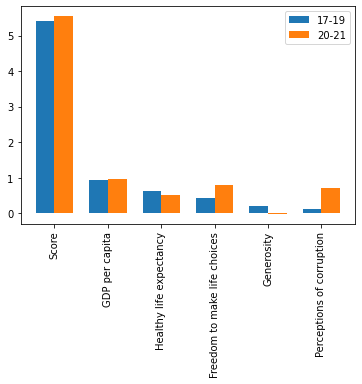

In [64]:
fig, ax=plt.subplots()

width = 0.35
index=np.arange(len(col_list))

p1=ax.bar(index-width/2, mean1719.tolist(), width, label='17-19')
p2=ax.bar(index+width/2, mean2021.tolist(), width, label='20-21')
ax.set_xticks(index)
ax.set_xticklabels(col_list)
plt.xticks(rotation='vertical')

ax.legend()

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

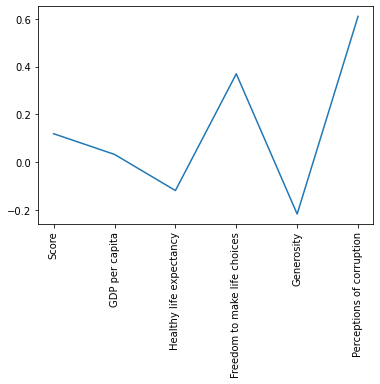

In [67]:
fig = plt.figure(figsize=(6,4))

plt.plot(mean_diff)
plt.xticks(rotation='vertical')

In [19]:
mean_diff=pd.DataFrame(data=mean_diff, columns=['difference'])
mean_diff

,difference
Score,NaN
GDP per capita,NaN
Healthy life expectancy,NaN
Freedom to make life choices,NaN
Generosity,NaN
Perceptions of corruption,NaN
